# Import libraries

In [ ]:
# imports for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchsummary import summary

# imports for vision tasks
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

# imports for preparing dataset
import os
import zipfile

# imports for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import dataset and set paths

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2024-04-23 22:58:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.180.207, 209.85.145.207, 142.251.172.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  72.5MB/s    in 0.9s    

2024-04-23 22:58:29 (72.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

print(os.listdir(base_dir))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

['train', 'vectorize.py', 'validation']


# Visualize dataset

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

print('train cat files:', train_cat_fnames[:10])
print('train dog files:', train_dog_fnames[:10])
print('validation cat files:', validation_cat_fnames[:10])
print('validation dog files:', validation_dog_fnames[:10])

print()

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

train cat files: ['cat.531.jpg', 'cat.63.jpg', 'cat.350.jpg', 'cat.352.jpg', 'cat.967.jpg', 'cat.596.jpg', 'cat.54.jpg', 'cat.892.jpg', 'cat.667.jpg', 'cat.496.jpg']
train dog files: ['dog.728.jpg', 'dog.281.jpg', 'dog.425.jpg', 'dog.722.jpg', 'dog.237.jpg', 'dog.311.jpg', 'dog.860.jpg', 'dog.52.jpg', 'dog.278.jpg', 'dog.204.jpg']
validation cat files: ['cat.2326.jpg', 'cat.2267.jpg', 'cat.2410.jpg', 'cat.2313.jpg', 'cat.2067.jpg', 'cat.2130.jpg', 'cat.2361.jpg', 'cat.2404.jpg', 'cat.2373.jpg', 'cat.2453.jpg']
validation dog files: ['dog.2209.jpg', 'dog.2028.jpg', 'dog.2053.jpg', 'dog.2120.jpg', 'dog.2038.jpg', 'dog.2231.jpg', 'dog.2002.jpg', 'dog.2005.jpg', 'dog.2399.jpg', 'dog.2366.jpg']

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


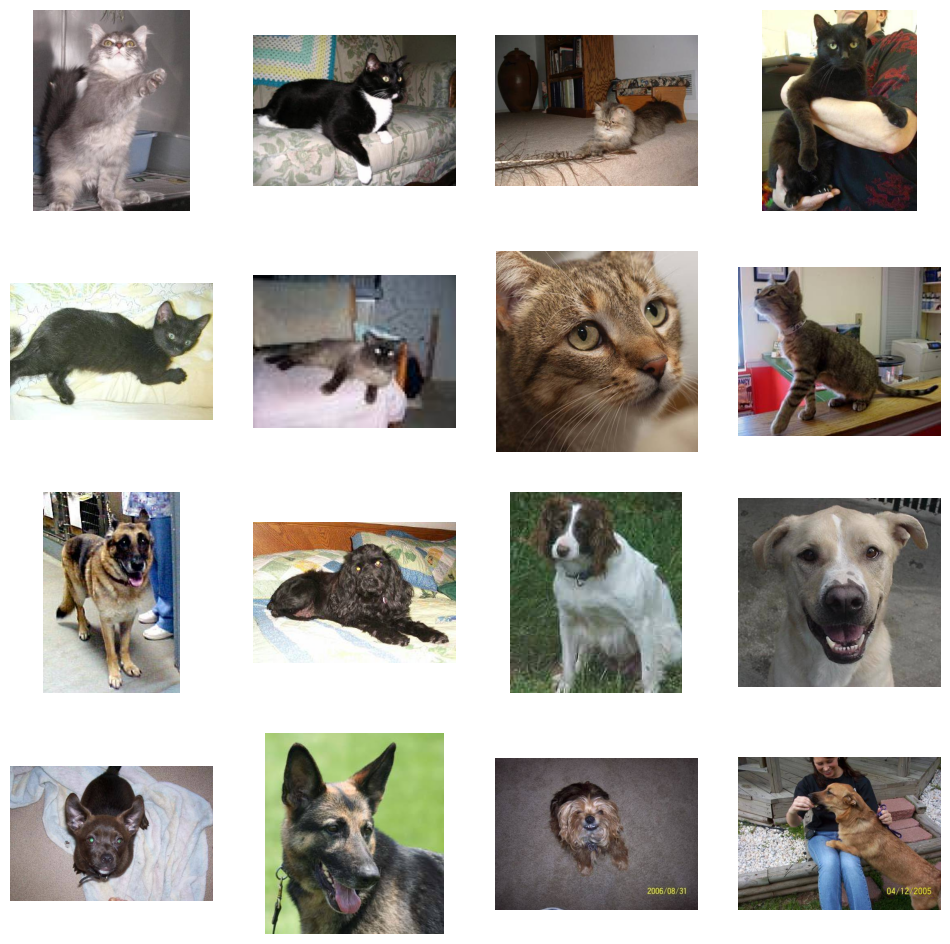

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Prepare dataset

In [ ]:
# Define data transformations and augmentations
train_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

# Load training and validation datasets with specified transformations
train_data = ImageFolder(root=train_dir, transform=train_transform)
validation_data = ImageFolder(root=validation_dir, transform=val_transform)

# Define validation and test dataset size
split_size = 0.5
validation_size = int(split_size * len(validation_data))  # 50% for validation
test_size = len(validation_data) - validation_size  # The rest for testing

# Split validation dataset into val/test
val_data, test_data = random_split(validation_data, [validation_size, test_size])

print('Length of train dataset:', len(train_data))
print('Length of validation dataset:', len(val_data))
print('Length of test dataset:', len(test_data))

Length of train dataset: 2000
Length of validation dataset: 500
Length of test dataset: 500


In [ ]:
# Useful attributes for understanding the dataset
print('Classes in the dataset:', train_data.classes)
print('List of image file paths:', train_data.imgs)

img, label = train_data[0]
print('Image dimensions:', img.shape)
print('Image label:', label)

Classes in the dataset: ['cats', 'dogs']
List of image file paths: [('/tmp/cats_and_dogs_filtered/train/cats/cat.0.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.1.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.10.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.100.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.101.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.102.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.103.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.104.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.105.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.106.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.107.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.108.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.109.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.11.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.110.jpg', 0), ('/tmp/cats_and_dogs_filtered/train/cats/cat.111.jpg'

In [ ]:
# Define number of classes for model
num_classes = len(train_data.classes)

In [ ]:
# Experiment with different batch sizes, generally use 2^x batch size
batch_size = 32
# num_workers can be changed to improve performance
num_workers = 0

# Dataset loading and preprocessing
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dl = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

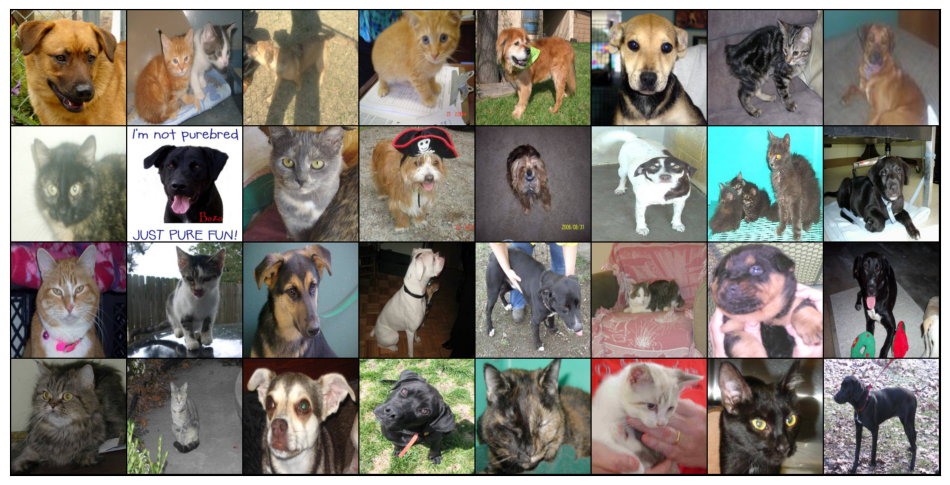

In [ ]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (12,9))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

show_batch(train_dl)

In [ ]:
# Set device to GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Define model

In [ ]:
# Define a lightweight CNN
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        # model takes input of 200 x 200 x 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1) # ensure in_channels aligns with out_channels from previous block
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2,2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool4 = nn.MaxPool2d(2,2)

        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool5 = nn.MaxPool2d(2,2)

        self.fc1 = nn.Linear(in_features=(6 * 6 * 128), out_features=64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

        self.relu = nn.ReLU()


    def forward(self, input):
        output = self.pool1(self.relu(self.bn1(self.conv1(input))))
        output = self.pool2(self.relu(self.bn2(self.conv2(output))))
        output = self.pool3(self.relu(self.bn3(self.conv3(output))))
        output = self.pool4(self.relu(self.bn4(self.conv4(output))))
        output = self.pool5(self.relu(self.bn5(self.conv5(output))))
        output = output.view(-1, 128*6*6)
        output = self.dropout(self.relu(self.fc1(output)))
        output = self.fc2(output)

        return output

model = Network().to(device)

summary(model,(3, 200,200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 200, 200]             896
       BatchNorm2d-2         [-1, 32, 200, 200]              64
              ReLU-3         [-1, 32, 200, 200]               0
         MaxPool2d-4         [-1, 32, 100, 100]               0
            Conv2d-5         [-1, 32, 100, 100]           9,248
       BatchNorm2d-6         [-1, 32, 100, 100]              64
              ReLU-7         [-1, 32, 100, 100]               0
         MaxPool2d-8           [-1, 32, 50, 50]               0
            Conv2d-9           [-1, 64, 50, 50]          18,496
      BatchNorm2d-10           [-1, 64, 50, 50]             128
             ReLU-11           [-1, 64, 50, 50]               0
        MaxPool2d-12           [-1, 64, 25, 25]               0
           Conv2d-13           [-1, 64, 25, 25]          36,928
      BatchNorm2d-14           [-1, 64,

# Define loss and optimizer

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
'''Code to implement learning rate scheduler to decrease lr during training process'''
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
# scheduler.step(epoch_val_loss)  # add this to the end of training loop (after validation)

'Code to implement learning rate scheduler to decrease lr during training process'

# Train model

In [ ]:
# Early stopping parameters
early_stopping_patience = 5

# Define the number of epochs to train for
epochs = 10

# Using validation loss as metric
best_val_loss = float('inf')
best_epoch = 0
early_stopping_counter = 0

# Save metrics at each epoch for plotting
epoch_train_loss_values = []
epoch_val_loss_values = []
epoch_train_acc_values = []
epoch_val_acc_values = []

for epoch in range(epochs):
    model.train()  # Set model to training mode

    train_losses, train_accuracies = [], []

    for data, label in train_dl:
        data, label = data.to(device), label.to(device)  # Move data to the same device as the model

        optimizer.zero_grad()  # Clear previous epoch's gradients
        output = model(data)  # Forward pass
        loss = criterion(output, label)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        # Accumulate metrics
        acc = (output.argmax(dim=1) == label).float().mean().item()
        train_losses.append(loss.item())
        train_accuracies.append(acc)

    # Average metrics across all training steps
    epoch_train_loss = sum(train_losses) / len(train_losses)
    epoch_train_accuracy = sum(train_accuracies) / len(train_accuracies)

    # Save current epochs training metrics
    epoch_train_loss_values.append(epoch_train_loss)
    epoch_train_acc_values.append(epoch_train_accuracy)

    # Validation
    model.eval()  # Set model to evaluation mode
    val_losses, val_accuracies = [], []
    with torch.no_grad():  # Disable gradient calculation
        for data, label in val_dl:
            data, label = data.to(device), label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            # Accumulate metrics
            acc = (val_output.argmax(dim=1) == label).float().mean().item()
            val_losses.append(val_loss.item())
            val_accuracies.append(acc)

    # Average metrics across all validation steps
    epoch_val_loss = sum(val_losses) / len(val_losses)
    epoch_val_accuracy = sum(val_accuracies) / len(val_accuracies)

    # Save current epochs validation metrics
    epoch_val_loss_values.append(epoch_val_loss)
    epoch_val_acc_values.append(epoch_val_accuracy)

    # Update best model if validation accuracy improves
    if epoch_val_loss < best_val_loss:
        torch.save(model.state_dict(), 'best_model.pth')

        best_val_loss = epoch_val_loss
        best_epoch = epoch + 1
        early_stopping_counter = 0

    else:
        early_stopping_counter += 1

    print(f'Epoch: {epoch + 1}\n'
          f'Train Acc: {epoch_train_accuracy:.3f}, Val Acc: {epoch_val_accuracy:.3f} '
          f'Train Loss: {epoch_train_loss:.3f}, Val Loss: {epoch_val_loss:.3f}')
    print(f'Best Metric: {best_val_loss:.3f} at epoch: {best_epoch}\n')

    if early_stopping_counter >= early_stopping_patience:
        print(f"Early stopping after {early_stopping_patience} epochs of no improvement.")
        break

Epoch: 1
Train Acc: 0.584, Val Acc: 0.626 Train Loss: 0.734, Val Loss: 0.636
Best Metric: 0.636 at epoch: 1

Epoch: 2
Train Acc: 0.671, Val Acc: 0.700 Train Loss: 0.611, Val Loss: 0.578
Best Metric: 0.578 at epoch: 2

Epoch: 3
Train Acc: 0.721, Val Acc: 0.725 Train Loss: 0.561, Val Loss: 0.548
Best Metric: 0.548 at epoch: 3

Epoch: 4
Train Acc: 0.758, Val Acc: 0.732 Train Loss: 0.513, Val Loss: 0.518
Best Metric: 0.518 at epoch: 4

Epoch: 5
Train Acc: 0.796, Val Acc: 0.677 Train Loss: 0.480, Val Loss: 0.644
Best Metric: 0.518 at epoch: 4

Epoch: 6
Train Acc: 0.801, Val Acc: 0.645 Train Loss: 0.448, Val Loss: 0.717
Best Metric: 0.518 at epoch: 4

Epoch: 7
Train Acc: 0.821, Val Acc: 0.773 Train Loss: 0.412, Val Loss: 0.487
Best Metric: 0.487 at epoch: 7

Epoch: 8
Train Acc: 0.832, Val Acc: 0.730 Train Loss: 0.393, Val Loss: 0.595
Best Metric: 0.487 at epoch: 7

Epoch: 9
Train Acc: 0.832, Val Acc: 0.725 Train Loss: 0.383, Val Loss: 0.640
Best Metric: 0.487 at epoch: 7

Epoch: 10
Train Acc

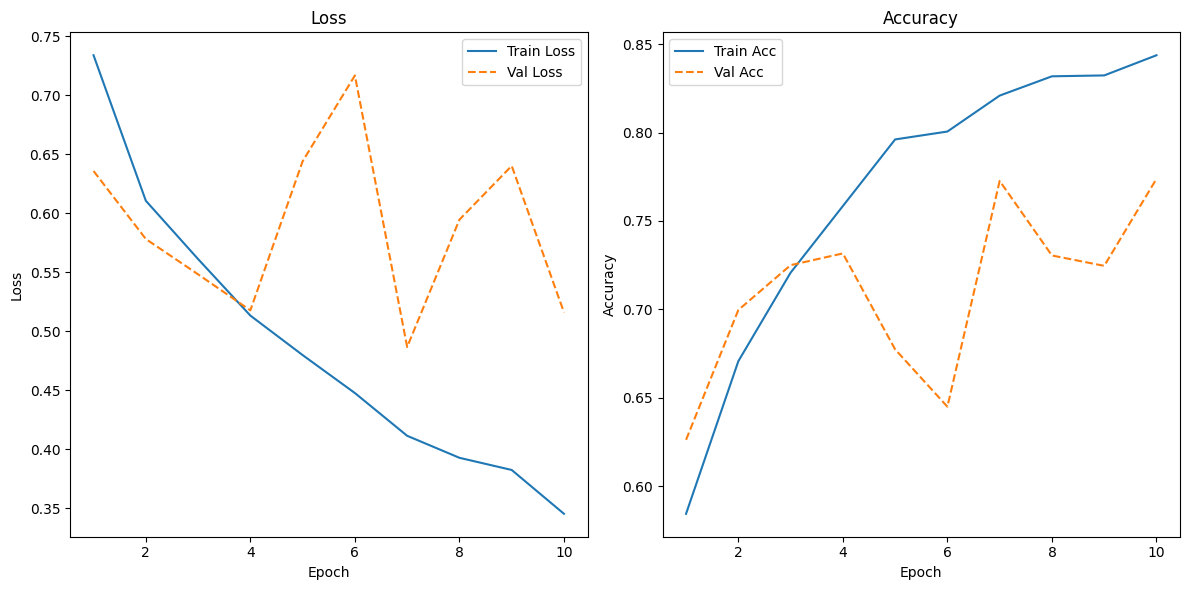

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.title("Loss")
x_train = [i + 1 for i in range(len(epoch_train_loss_values))]
y_train = epoch_train_loss_values
x_val = [i + 1 for i in range(len(epoch_val_loss_values))]
y_val = epoch_val_loss_values
plt.plot(x_train, y_train, label='Train Loss')
plt.plot(x_val, y_val, label='Val Loss', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.title("Accuracy")
x_train_acc = [i + 1 for i in range(len(epoch_train_acc_values))]
y_train_acc = epoch_train_acc_values
x_val_acc = [i + 1 for i in range(len(epoch_val_acc_values))]
y_val_acc = epoch_val_acc_values
plt.plot(x_train_acc, y_train_acc, label='Train Acc')
plt.plot(x_val_acc, y_val_acc, label='Val Acc', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Test model

In [ ]:
# Use DataLoader for test data same as train and validation datasets
test_dl = DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

# Load saved model parameters
model.load_state_dict(torch.load('best_model.pth'))

model.eval() # Set for validation and testing

# Test Loop
with torch.no_grad():  # Disable gradient tracking
    total_accuracy, total_test_loss = 0.0, 0.0
    num_batches = len(test_dl)

    for data, label in test_dl:
        data, label = data.to(device), label.to(device)  # Load data to same device as model

        output = model(data)
        loss = criterion(output, label)
        accuracy = (output.argmax(dim=1) == label).float().mean()

        total_test_loss += loss.item()
        total_accuracy += accuracy.item()

    # Calculate the average loss and accuracy over all batches
    avg_loss = total_test_loss / num_batches
    avg_accuracy = total_accuracy / num_batches

    print(f'test accuracy : {avg_accuracy:.3f}, test loss : {avg_loss:.3f}')

test accuracy : 0.810, test loss : 0.432
